<img src="Images/scikitlogo.png" width="250">

# Scikit Learn Project  

[Scikit Learn webpage](https://scikit-learn.org/stable/)

***

<br>

## Table of Contents

#### [1. Introduction](#Introduction)
- [Import libraries]()

#### [2. Exploratory Analysis of Wine Quality Data](#)
- [EDA - using Pandas]()
- [Visualise the data - using Seaborn]()

#### [3. Test and Train the Data](#)

#### [4. ](#)

#### 5. 


<br>

## Definitions 
- Regression analysis is a way of mathematically sorting out which of those variables does indeed have an impact.


<a href=#Introduction></a>
***
# <center> 1. Introduction </center>
***

As we strive for a 'smarter' world the use of machine learning (ML) algorithm is increasing rapidly. ML algorithm usage is widespread spanning areas such as business, medicine, consumer experience and security practices (an example of such is facial recognition). For this reason, efficient ML software is an indispensible tool for many modern processes.

<b>Scikit learn</b>, also known as Sklearn, is an open-source machine learning (ML) library for python which is built on top of NumPy, SciPy and Matplotlib.[https://towardsdatascience.com/scikit-learn-vs-sklearn-6944b9dc1736] The Scikit learn library provides a wide range of supervised and unsupervised learning algorithms. The supervised learning approach "trains" or "supervises" algorithms on labeled data sets which can then classify data or acurately predict outcomes. 

#### Supervised vs. Unsupervised

The majority of ML algorithms are supervised where there are input and output variables or labels. Supervised algorithms use these variables to analyse and train the data, producing an inferred function which is then used to map out new examples. A key process in all of this is generalising the training data and ideally, correctly determining the features for unseen data.[https://en.wikipedia.org/wiki/Supervised_learning] The statistical quality of an algorithm, how accurately the algorithm predicts the outcome values, can be measured using generalization error. Generalization error assesses the risk for sampling error, 'the difference between the sample statistic and population parameter' to ensure [Sarndal, Swenson, and Wretman (1992), Model Assisted Survey Sampling, Springer-Verlag, ISBN 0-387-40620-4]

Three machine learning algorithms were chosen from the Scikit learn library to perform an analytics on the well-known Wine Quality Data Set.(https://archive.ics.uci.edu/ml/datasets/Wine+Quality) 

Article based on this data set: https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377?via%3Dihub

Useful article: <br>
Regression from scratch — Wine quality predictionhttps://medium.datadriveninvestor.com/regression-from-scratch-wine-quality-prediction-d61195cb91c8

## Import libraries
***

In [339]:
# Numerical array.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Logistic regression.
import sklearn.linear_model as lm

# K nearest neighbours.
import sklearn.neighbors as nei

# Helper functions.
import sklearn.model_selection as mod

# Plotting nice statistical plots.
import seaborn as sns

# Metrics
import sklearn.metrics as met

# Scikit learn datasets.
from sklearn import datasets

# Opens URLs.
import urllib.request as urllib


#LINEar regre, 
#rom sklearn.linear_model import LinearRegression


In [340]:
# Set default plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Setting colour scheme.
plt.style.use('ggplot')

<br>

***
# <center>2. Exploratory Analysis</center>
### <center>Wine Quality Data Set</center>

***

<br>

<b>Data Set objective:</b> To predict the quality score of the wine based on its chemical properties. 

<b>About the data set:</b>

- Give list of variables & basic description. 



## Load the data

[Data Set Source](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)
***

In this section, the [Pandas library](https://pandas.pydata.org/) will be relied on heavily for the data exploration. 

<i> Note, some minor processing that took place before loading the data with Pandas:</i><br>
- Converted dataset from xlxs file to csv 
- Corrected the csv file by replacing all of the semi-colons (delimiters) with commas using the find an replace tool in the TextEdit program on Mac. 

In [341]:
# Loading the Wine Quality Data Set.
df = pd.read_csv("data/winequality_red.csv")

# View the first few lines of data set.
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<br>

## Eyeball the data
***

The `Pandas.info()` function to returns some useful information such as: 

   - <b>the shape</b> : number of columns & rows
   - <b>column names</b> : variables
   - <b>Dtype</b> : data type
   - <b>Non-Null Count</b> : the number of non-null values in data

In [342]:
# Retrieve general information about the dataframe. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<br>

The `Pandas.isnull()` function coupled with sum() returns a count of non-null values in the data.

In [343]:
# Check for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Describe the data
***

The `Pandas.describe()` method gives some important statistical measures of the data such as the mean, standard deviation etc.

In [344]:
# Statistical summary
df.describe().round(2)  # round data to 2 decimal places

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


- Here, a list of column names is created and stored in the variable `col_names` for reference later on. 

In [345]:
# Store a list with column names for repeated use.
col_names = df.columns
col_names

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<br>

## Visualising the data

***

Pandas has some useful methods we can use to visualise data while using minimal code to create simple plots. 

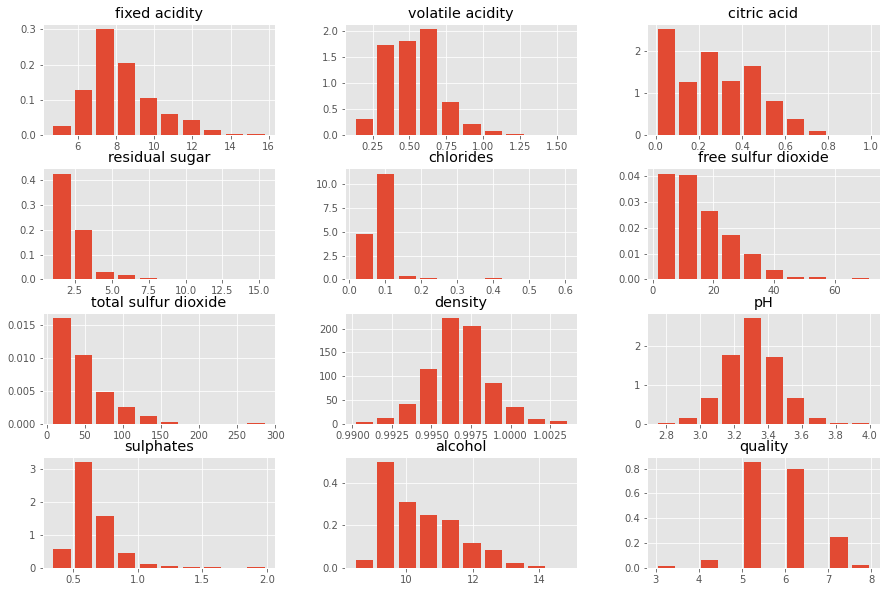

In [346]:
# Change figure size. 
plt.rcParams['figure.figsize'] = (15, 10)

# Histogram and normal distribution plot of each variable.
df.hist(rwidth=0.8, density=True);

The histograms above gives us a general idea of the spread of values of each variable. 


### Correlations Map
***


Using [Seaborn's correlation heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html), we can visualise and measure the correlations between individual variables. Our dependent variable is of particular interest to us, we must analyse how the different properties in the wine affect its quality.

In [347]:
# Get correlation values. 
correlations = df.corr()['quality'].drop('quality')
correlations

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64

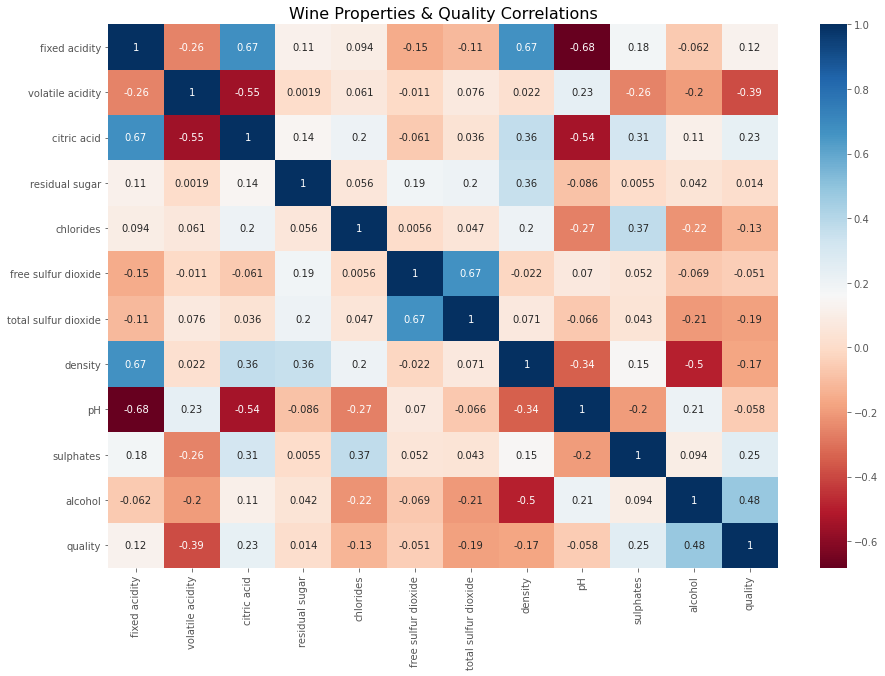

In [348]:
# Create figure & axis.
fig, ax = plt.subplots()

# Plot correlations.
sns.heatmap(df.corr(), annot = True, cmap = 'RdBu')

# Set plot title.
ax.set_title("Wine Properties & Quality Correlations", fontsize=16);

<b>Most significant correalations:</b>
- positive correlation between alcohol and quality. 
- negative correlation between quality and volatile acidity. 


### List features with significant correlations
***

To get a list of significant correlations:

- First, get the absolute (non-negative) correlation value using [Pandas `abs()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.abs.html) method
- Then, abstract values over 0.05 (reason for choosing this number is explained below)
- Finally, add the values to a list

In [349]:
# Gets absolute numeric values of correlation results.
abs_corrs = correlations.abs()

# Save column names with correlations over 0.05 to list.
high_corrs = abs_corrs[abs_corrs.values > 0.05].index.values.tolist()

high_corrs

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

The code above returns all of the variables apart from residual sugar (quality was removed earlier). They all had a correlation value above 0.05. Why did we choose the value 0.05? 

From [Minitab Express](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/how-to/correlation/interpret-the-results/#:~:text=Usually%2C%20a%20significance%20level%20(denoted,is%20significantly%20different%20from%200.): 

<i>"Usually, a significance level (denoted as α or alpha) of 0.05 works well. An α of 0.05 indicates that the risk of concluding that a correlation exists—when, actually, no correlation exists—is 5%. The p-value tells you whether the correlation coefficient is significantly different from 0.</i>

<b>P-value ≤ α: The correlation is statistically significant</b>

If the p-value is less than or equal to the significance level, then you can conclude that the correlation is different from 0.

<b>P-value > α: The correlation is not statistically significant</b>

If the p-value is greater than the significance level, then you cannot conclude that the correlation is different from 0."


### Visualising Two Dimensions
***

<br>

#### Bar Plot

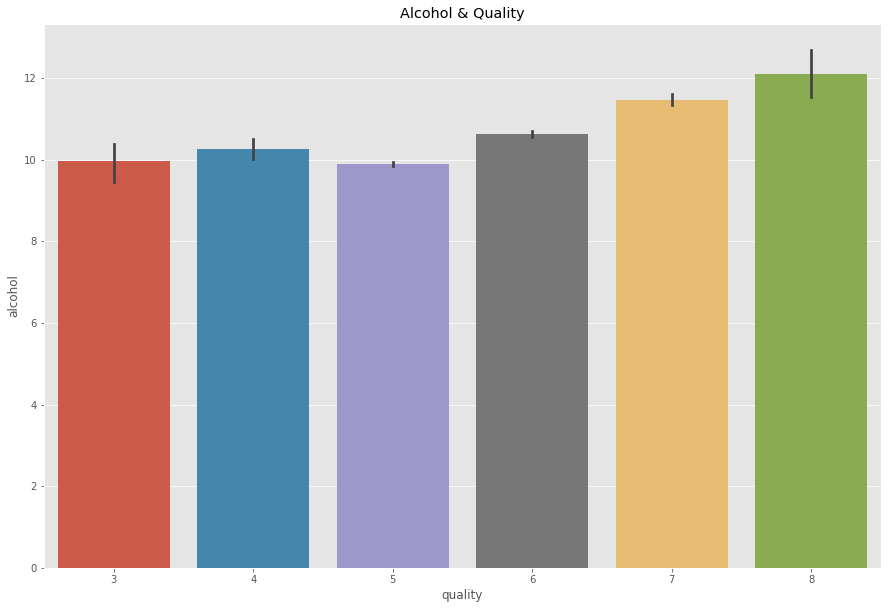

In [350]:
# Create figure & axes. 
fig, ax = plt.subplots()

# Change plot size.
plt.rcParams['figure.figsize'] = (10, 7)

# Barchart with alcohol & quality.
sns.barplot(y = "alcohol", x = "quality", data = df)

# Set plot title.
ax.set_title("Alcohol & Quality");

This plot confirms the correlation we found in our analysis above. There is a positive correlation between alcohol and quality - <b>the higher the alcohol content of the wine, the higher it score . 

<br>

#### Scatter plot with regression line

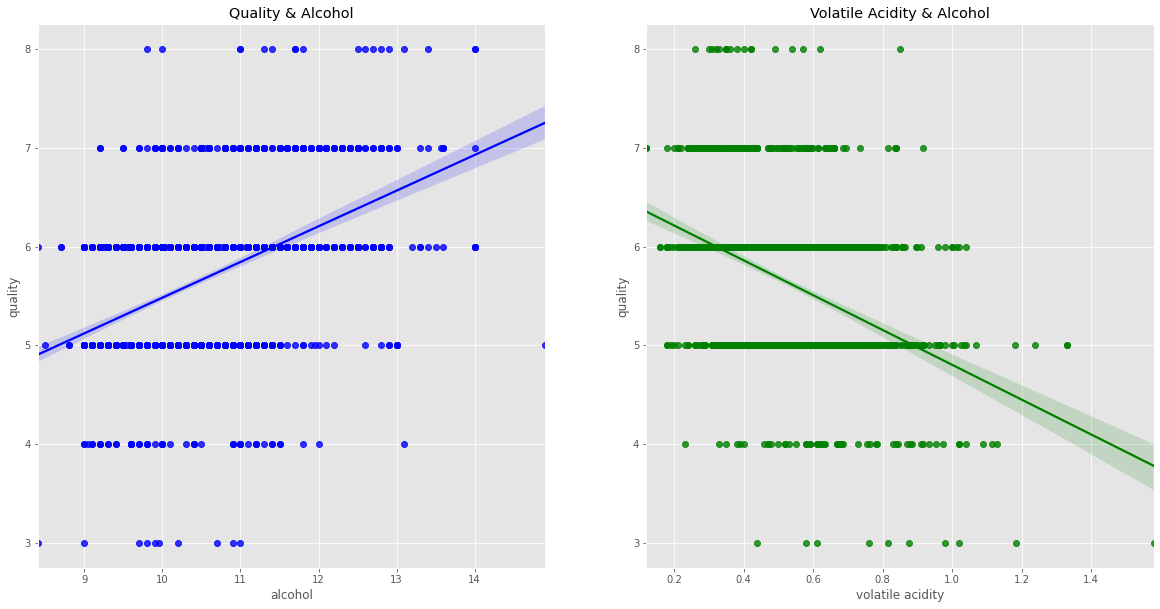

In [351]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot with alcohol & quality.
sns.regplot(ax=ax[0], x="alcohol", y="quality", color='blue', data=df, 
           fit_reg=True)
ax[0].set_title("Quality & Alcohol")

# Plot volatile acidity and quality.
ax[1].set_title("Volatile Acidity & Alcohol")
sns.regplot(ax=ax[1], x="volatile acidity", y="quality", color='green', data=df, 
           fit_reg=True);

The plots above visually depicts the results of the correlations map: 
- alcohol & quality are positively correlated - as alcohol content increases the quality score also increases
- volatile acidity are negatively correlated - as volatile acidity increases the quality score decreases

<br>

#### Means of properties grouped by quality

We can use Pandas [groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) function coupled with the `mean()` function to get the means of each variable grouped by quality.

In [352]:
# Group by quality. 
group = df.groupby('quality')

This pivot tables gives us a quick summary of the mean values of the properties associated with the corresponding quality scores.

In [353]:
# Pivot tables.
group.mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


<br>

#### Violin & Box Plots

We will create bar & violin plots to visualise the spread of data across all variables. 

[Seaborn box plot documentation](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

In [354]:
# Create a list of variable names.
col_names = list(df.columns)

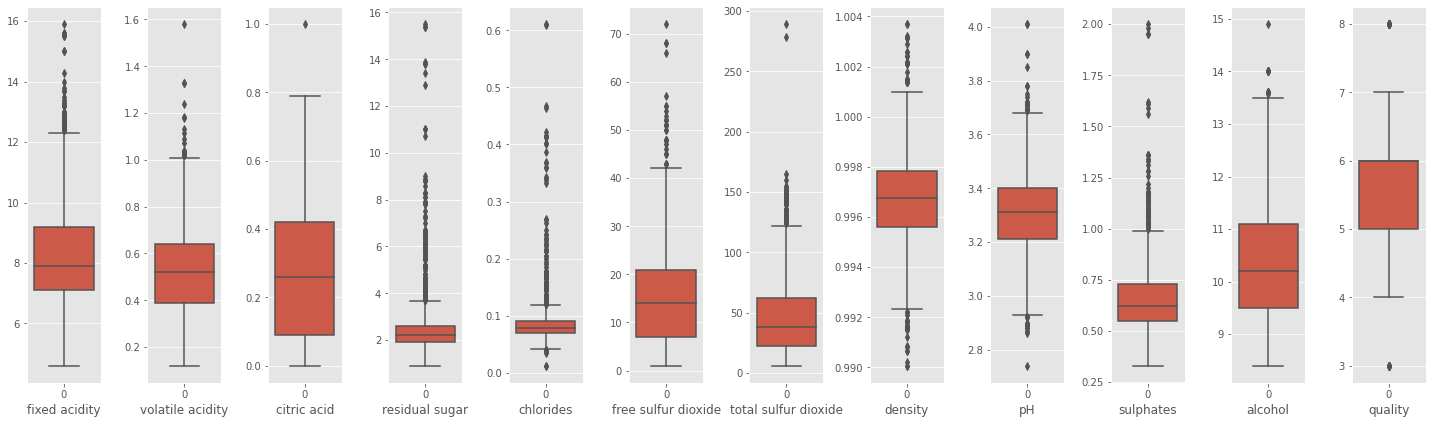

In [355]:
# Code adapted from: https://matplotlib.org/stable/tutorials/intermediate/arranging_axes.html

# Create box plot.
fig = plt.figure(figsize = (20, 6)) # figsize = width, height in inches.
gs = fig.add_gridspec(1, 12) # A grid for which we can place the data.

count = 0

# Iterates thorugh variables, creating a box plot for each and placing on grid.
for var in col_names:
    ax = fig.add_subplot(gs[0, count])
    sns.boxplot(data=df[var])
    ax.set_xlabel(var)
    count += 1

# Fit plots in figure area.
fig.tight_layout()

plt.show()

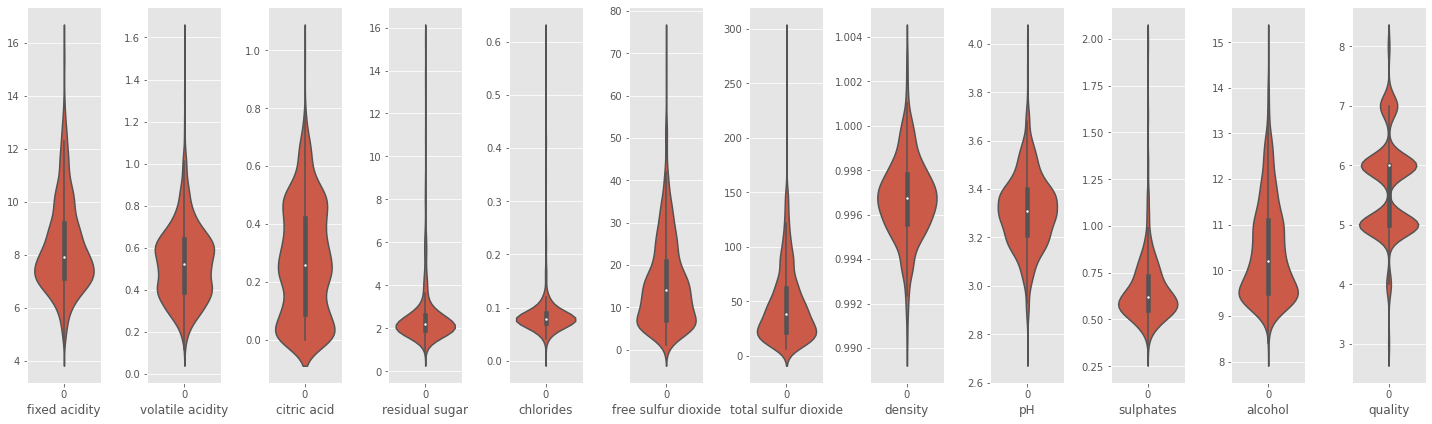

In [356]:
# Create violin Plot
fig = plt.figure(figsize = (20, 6)) # figsize = width, height in inches.
gs = fig.add_gridspec(1, 12) # A grid for which we can place the data.

count = 0

# Iterates thorugh variables, creating a violin plot for each and placing on grid.
for var in col_names:
    ax = fig.add_subplot(gs[0, count])
    sns.violinplot(data=df[var])
    ax.set_xlabel(var)
    count += 1

# Fit plots in figure area.
fig.tight_layout()

plt.show()

<b>Observations:</b>

- <b>Quality</b>: most values are between 5 and 7 while there are no values in categories 1, 2 and 10 and few values in categories 3, 4 and 9. 
- Some variables have <b>outliers</b>: fixed acidity, volatile acidity and citric acid. However, if those outliers were removed their distribution would be quite symmetrical. 

- <b>Residual</b> sugar has a <b>very skewed</b> distribution. Even if the outliers were removed, it is unlikely the spread would be symmetrical.

- Many of the <b>outliers are large</b>. 

- <b>Alcohol is asymmetrically distributed</b>, although there are <b>no outliers</b>. 

***
# <center>3. Test and Train Split</center>
***

<br>

<b>Why is it important to split your data?</b>

<i>From a [Real Python tutorial](https://realpython.com/train-test-split-python-data/):</i>
    
"Supervised machine learning is about creating models that precisely map the given inputs (independent variables, or predictors) to the given outputs (dependent variables, or responses)."

As it is essential to carry out an <u>unbiased assessment</u> on the success of the model's predictions, we cannot use the same data we used to train the model - the data must be unseen by the model. 

This is we <b>split the data in two</b>:

- <b>Training data</b> : used to train the model
- <b>Test data</b> : used to test the model

<br>

### sklearn.model_selection.train_test_split
***

The data will be split using the `train_test_split()` [function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from Scikit Learn's sklearn.model_selection library.

The split will be <b>80/20 (train/test)</b>. This is specified by using the `test_size` parameter and passing a floating point number to specify the size of the test data.

In [357]:
# Splits the dataframe 80/20 (train/test). 
train, test = mod.train_test_split(df, test_size=0.2)

<br>

Let's assess how the data has been split by previewing the training data. 

In [358]:
# Views some of the training data.
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
219,7.8,0.53,0.33,2.4,0.080,24.0,144.0,0.99655,3.30,0.60,9.5,5
956,9.0,0.36,0.52,2.1,0.111,5.0,10.0,0.99568,3.31,0.62,11.3,6
192,6.8,0.63,0.12,3.8,0.099,16.0,126.0,0.99690,3.28,0.61,9.5,5
1015,10.5,0.39,0.46,2.2,0.075,14.0,27.0,0.99598,3.06,0.84,11.4,6
1547,6.3,0.60,0.10,1.6,0.048,12.0,26.0,0.99306,3.55,0.51,12.1,5


In [359]:
# View indices of train array.
train.index

Int64Index([ 219,  956,  192, 1015, 1547,  190,  493,  256, 1324,  123,
            ...
             587, 1520,  281,  184,  603,  735,  852, 1031,  704,  646],
           dtype='int64', length=1279)

In [360]:
# Check size of training data.
train.index.size

1279

<br>

Now, let's take a look at the test data. 

In [361]:
# Shows some test data.
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1399,7.2,0.670,0.00,2.2,0.068,10.0,24.0,0.99560,3.42,0.72,11.1,6
575,12.3,0.270,0.49,3.1,0.079,28.0,46.0,0.99930,3.20,0.80,10.2,6
214,7.8,0.735,0.08,2.4,0.092,10.0,41.0,0.99740,3.24,0.71,9.8,6
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1371,7.5,0.580,0.56,3.1,0.153,5.0,14.0,0.99476,3.21,1.03,11.6,6


In [362]:
# Size of test data set.
test.index.size

320

The data was split 80/20, as desired.

All looks good so far! 

<br>

## Plot the Test & Train

***

Ideally, we want the data to be segregated evenly throughout the data set. 

To check this, the following block of code was used to create a plot which depicts exactly how the test/train split the data. 

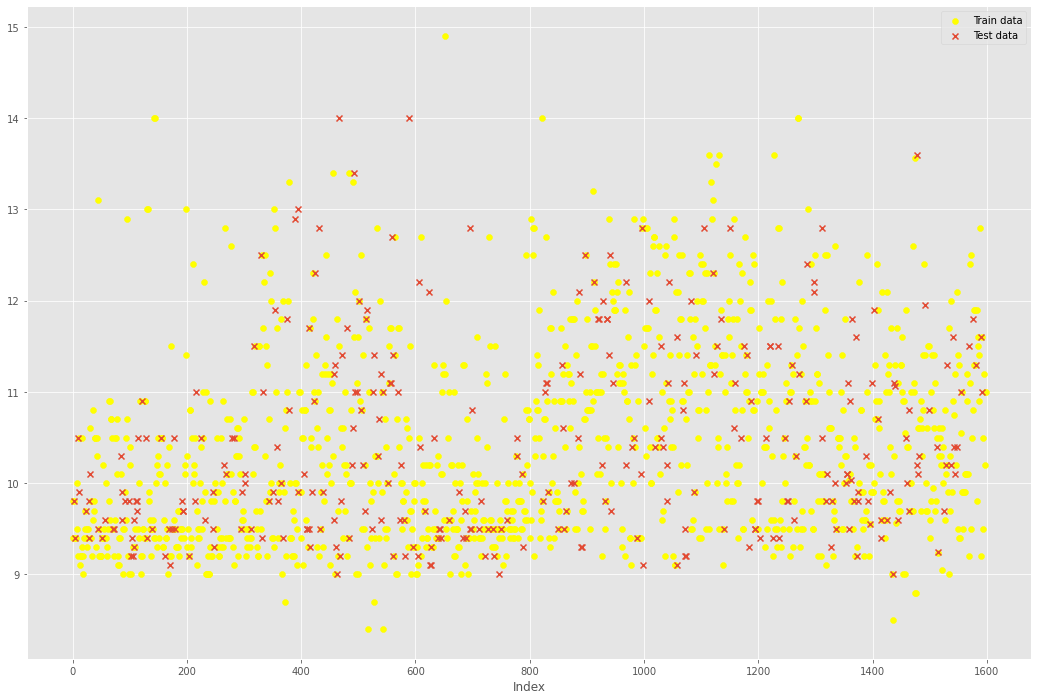

In [393]:
# Create figure & axis.
fig, ax = plt.subplots(figsize=(18, 12))

# Scatter plots for training data.
ax.scatter(train.index, train["alcohol"], marker='o', color="yellow", label='Train data')

# Scatter plot for testing data.
ax.scatter(test.index, test["alcohol"], marker='x', label='Test data')

# Show the legend.
ax.set_xlabel('Index')
ax.legend();

As seen in the plot above, the <b>test data was chosen evenly</b> from the dataset by test_train_split method. 

<br>
    
#### A final sanity check (before moving on to modelling)
***

There are <b>two ways</b> of accessing rows in the data set:

- iloc : by the index position
- loc : by its label

The following will use the index position to access row data and this will be compared to the original data set to ensure data integrity after the processing thus far. 

In [394]:
# Check that line 727 matches original data. 
df.iloc[727]

fixed acidity            6.400
volatile acidity         0.570
citric acid              0.020
residual sugar           1.800
chlorides                0.067
free sulfur dioxide      4.000
total sulfur dioxide    11.000
density                  0.997
pH                       3.460
sulphates                0.680
alcohol                  9.500
quality                  5.000
Name: 727, dtype: float64

Because python uses 0-based indexing, the corresponding row in the original file will be one integer higher. 

The last check was completed on the 12/1/22 and it was <b>confirmed that the data corrresponds to the original</b>. 

<br>

## Two Dimensions: Logistic Regression??

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [400]:
# Specify inputs & outputs for training data.
inputs = train[col_names]
outputs = train['quality']

In [401]:
# Preview inputs.
inputs.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
219,7.8,0.53,0.33,2.4,0.080,24.0,144.0,0.99655,3.30,0.60,9.5,5
956,9.0,0.36,0.52,2.1,0.111,5.0,10.0,0.99568,3.31,0.62,11.3,6
192,6.8,0.63,0.12,3.8,0.099,16.0,126.0,0.99690,3.28,0.61,9.5,5
1015,10.5,0.39,0.46,2.2,0.075,14.0,27.0,0.99598,3.06,0.84,11.4,6
1547,6.3,0.60,0.10,1.6,0.048,12.0,26.0,0.99306,3.55,0.51,12.1,5


In [402]:
# Creates a new classifier.
# Solver & max iters info. https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter
lre = lm.LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000) # Parameter is random state, meaning it uses the same random process each time.

# Train the classifier on the data.
lre.fit(inputs[['alcohol', 'volatile acidity']], outputs)

LogisticRegression(max_iter=1000, random_state=0)

In [403]:
# See how the algorithm classified the data.
predictions = lre.predict(test[['alcohol', 'volatile acidity']])
predictions

array([6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5,
       6, 5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5,
       5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 7, 6, 6, 5, 6, 5, 6, 6, 6, 5, 5,
       5, 5, 5, 5, 6, 5, 7, 6, 7, 6, 6, 6, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5,
       5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 5, 7, 6, 5, 5, 5, 5, 5, 5,
       6, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 7, 5, 6, 5, 6, 5, 5, 6, 6, 5,
       5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5,
       5, 5, 6, 5, 6, 5, 5, 6, 5, 6, 5, 5, 6, 5, 7, 6, 5, 6, 6, 5, 7, 5,
       5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6, 5, 5,
       5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 6, 7, 6, 5, 5, 6, 7,
       5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 6, 5, 7, 5, 5, 5,
       5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 7, 5, 5, 6, 6,
       6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5,

In [404]:
# View the misclassifications.
predictions == test['quality']

1399     True
575      True
214     False
1590     True
1371     True
        ...  
1334     True
608     False
1158     True
1170     True
44       True
Name: quality, Length: 320, dtype: bool

## Accuracy
***

The score(X, y) method determines the accuracy of the algorithm on the test data, returning a score out of 1.

In [405]:
# How accurate was the algorithm?
lre.score(test[['alcohol', 'volatile acidity']], test['quality'])

0.546875

<br>

## Misclassified

In [406]:
# Show the predictions with a column the table. 
test['predicted'] = predictions
test.head()

/var/folders/xq/j7llnxgx78d984nx_t1lty9c0000gn/T/ipykernel_14414/2389557802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted'] = predictions


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,predicted
1399,7.2,0.670,0.00,2.2,0.068,10.0,24.0,0.99560,3.42,0.72,11.1,6,6
575,12.3,0.270,0.49,3.1,0.079,28.0,46.0,0.99930,3.20,0.80,10.2,6,6
214,7.8,0.735,0.08,2.4,0.092,10.0,41.0,0.99740,3.24,0.71,9.8,6,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6,6
1371,7.5,0.580,0.56,3.1,0.153,5.0,14.0,0.99476,3.21,1.03,11.6,6,6


In [407]:
# Shows the misclassified data.
misclass = test[test['predicted'] != test['quality']]
misclass

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,predicted
214,7.8,0.735,0.08,2.4,0.092,10.0,41.0,0.99740,3.24,0.71,9.8,6,5
490,9.3,0.775,0.27,2.8,0.078,24.0,56.0,0.99840,3.31,0.67,10.6,6,5
375,11.5,0.540,0.71,4.4,0.124,6.0,15.0,0.99840,3.01,0.83,11.8,7,6
552,9.5,0.460,0.24,2.7,0.092,14.0,44.0,0.99800,3.12,0.74,10.0,6,5
939,6.2,0.460,0.17,1.6,0.073,7.0,11.0,0.99425,3.61,0.54,11.4,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,6,7
1360,9.2,0.540,0.31,2.3,0.112,11.0,38.0,0.99699,3.24,0.56,10.9,5,6
458,10.4,0.330,0.63,2.8,0.084,5.0,22.0,0.99980,3.26,0.74,11.2,7,6
1235,6.0,0.330,0.32,12.9,0.054,6.0,113.0,0.99572,3.30,0.56,11.5,4,6


In [408]:
test["quality"].count()

320

#### Count the misclassifications

In [409]:
misclass.count()

fixed acidity           145
volatile acidity        145
citric acid             145
residual sugar          145
chlorides               145
free sulfur dioxide     145
total sulfur dioxide    145
density                 145
pH                      145
sulphates               145
alcohol                 145
quality                 145
predicted               145
dtype: int64

In [410]:
# View descriptive statistics for train quality.
round(train.groupby('quality').mean(), 3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.471,0.959,0.177,2.564,0.104,8.143,22.571,0.998,3.411,0.544,9.950
4,7.859,0.709,0.172,2.609,0.094,12.750,36.909,0.996,3.380,0.597,10.333
5,8.115,0.572,0.242,2.513,0.094,17.350,57.013,0.997,3.306,0.623,9.901
6,8.366,0.496,0.276,2.489,0.086,15.439,40.150,0.997,3.314,0.672,10.636
7,8.735,0.398,0.366,2.630,0.076,14.522,35.981,0.996,3.296,0.741,11.455
8,8.677,0.412,0.395,2.692,0.070,14.769,31.923,0.995,3.237,0.772,12.085


In [411]:
# View descriptive statistics for test quality.
round(test.groupby('quality').mean(), 3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,predicted
quality,,,,,,,,,,,,
3,8.100,0.710,0.157,2.800,0.165,17.667,30.333,0.997,3.367,0.630,9.967,5.000
4,7.389,0.622,0.186,3.111,0.074,9.889,33.000,0.997,3.390,0.592,9.933,5.222
5,8.386,0.599,0.250,2.597,0.089,15.462,54.439,0.997,3.302,0.611,9.894,5.220
6,8.274,0.502,0.266,2.432,0.082,16.748,43.602,0.997,3.334,0.689,10.605,5.571
7,9.455,0.429,0.416,3.107,0.079,12.026,30.947,0.997,3.271,0.741,11.513,6.079
8,8.280,0.454,0.382,2.280,0.065,9.400,37.400,0.995,3.346,0.756,12.120,6.200


### Plot misclassifications
***

https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/main/iris-classification.ipynb

<br>

## Logistic Regression - Using All Inputs

***

In [412]:
# Load the data
df = pd.read_csv("data/winequality_red.csv")

# Split data frame in two
train, test = mod.train_test_split(df)

# Makes all variables inputs.
inputs, outputs = train[col_names], train['quality']

In [413]:
# Creates new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on the data.
lre.fit(inputs, outputs)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [414]:
# Classify, predicts the test data.
predictions = lre.predict(test[col_names])
predictions

array([6, 5, 5, 6, 7, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6,
       5, 5, 5, 6, 6, 7, 6, 6, 5, 5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 5, 5,
       5, 5, 5, 7, 6, 6, 6, 5, 7, 7, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 7, 5,
       6, 5, 5, 5, 5, 5, 7, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6, 6,
       6, 6, 5, 7, 7, 5, 7, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5,
       5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 7, 6, 5, 5, 6, 6, 5, 7, 6, 6, 6,
       6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 7, 5, 6, 7, 6, 5, 5, 5, 5, 6, 5, 5,
       5, 6, 6, 5, 6, 6, 7, 6, 6, 6, 6, 5, 7, 7, 5, 5, 6, 6, 6, 5, 6, 5,
       7, 7, 6, 5, 6, 6, 5, 6, 5, 7, 6, 6, 5, 5, 5, 5, 7, 7, 5, 7, 6, 6,
       6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5,
       5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 7, 6, 6,
       7, 6, 5, 5, 5, 5, 6, 6, 5, 6, 7, 6, 6, 5, 5, 5, 5, 7, 5, 5, 5, 7,
       5, 5, 5, 5, 7, 5, 6, 7, 5, 5, 5, 7, 6, 7, 5,

In [415]:
# Views the misclassifications.
(predictions == test['quality']).value_counts()

True     358
False     42
Name: quality, dtype: int64

In [416]:
# Percentage score.
lre.score(test[col_names], test['quality'])

0.895

In [417]:
# Append predictions column to test dataframe. 
test['predicted'] = predictions
test.head()

/var/folders/xq/j7llnxgx78d984nx_t1lty9c0000gn/T/ipykernel_14414/4025106790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted'] = predictions


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,predicted
101,7.8,0.50,0.30,1.9,0.075,8.0,22.0,0.9959,3.31,0.56,10.4,6,6
110,7.8,0.56,0.19,1.8,0.104,12.0,47.0,0.9964,3.19,0.93,9.5,5,5
71,7.7,0.67,0.23,2.1,0.088,17.0,96.0,0.9962,3.32,0.48,9.5,5,5
968,9.0,0.40,0.43,2.4,0.068,29.0,46.0,0.9943,3.20,0.60,12.2,6,6
1433,6.1,0.40,0.16,1.8,0.069,11.0,25.0,0.9955,3.42,0.74,10.1,7,7


This algorithm predicted the correct quality based on the various chemical properties in "Enter number here" percent of cases. 

## Nearest Neighbours Classifier

[KNN Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

***

In [418]:
# Load wine quality data set.
df = pd.read_csv("data/winequality_red.csv")

# List of the variables
col_names = df.columns # this was list(df.columns) before, incase problem. 

In [419]:
# Splits the dataframe in two.
train, test = mod.train_test_split(df)

In [420]:
# Uses all variables as inputs
inputs, outputs = col_names, 'quality'

In [421]:
# Classifier with 10 nearest neighbors. 
knn = nei.KNeighborsClassifier(n_neighbors=5)

In [422]:
# Fit wih training data.
knn.fit(train[inputs], train[outputs])

KNeighborsClassifier()

In [423]:
# Test on the training data.
knn.score(train[inputs], train[outputs])

0.7381150959132611

In [424]:
# Predict.
predictions = knn.predict(test[inputs])

In [425]:
# Score/accuracy
(predictions == test['quality']).value_counts(normalize=True)

True     0.565
False    0.435
Name: quality, dtype: float64

In [426]:
# Add new column to test dataframe with predictions
test["predictions"] = predictions
test

/var/folders/xq/j7llnxgx78d984nx_t1lty9c0000gn/T/ipykernel_14414/1097304577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predictions"] = predictions


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,predictions
1349,6.9,0.570,0.00,2.8,0.081,21.0,41.0,0.99518,3.41,0.52,10.8,5,6
128,8.0,0.590,0.16,1.8,0.065,3.0,16.0,0.99620,3.42,0.92,10.5,7,6
766,8.8,0.590,0.18,2.9,0.089,12.0,74.0,0.99738,3.14,0.54,9.4,5,5
100,8.3,0.610,0.30,2.1,0.084,11.0,50.0,0.99720,3.40,0.61,10.2,6,5
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,7.1,0.430,0.42,5.5,0.071,28.0,128.0,0.99730,3.42,0.71,10.5,5,5
513,10.5,0.510,0.64,2.4,0.107,6.0,15.0,0.99730,3.09,0.66,11.8,7,6
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4,5,6
290,8.7,0.520,0.09,2.5,0.091,20.0,49.0,0.99760,3.34,0.86,10.6,7,6


<br>

## Cross Validation
https://scikit-learn.org/stable/modules/cross_validation.html

In [427]:
knn = nei.KNeighborsClassifier()
scores = mod.cross_val_score(knn, df[col_names], df['quality'])
scores

array([0.53125   , 0.55625   , 0.54375   , 0.490625  , 0.54545455])

In [428]:
print(f"Mean: {scores.mean()} \t Standard Deviation: {scores.std()}") 

Mean: 0.5334659090909091 	 Standard Deviation: 0.022842322434789248


In [429]:
lre = lm.LogisticRegression(random_state=0)
scores = mod.cross_val_score(lre, df[col_names], df['quality'])
scores

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.8625    , 0.834375  , 0.88125   , 0.90625   , 0.88401254])

In [430]:
print(f"Mean: {scores.mean()}, \t Standard Deviation: {scores.std()}")

Mean: 0.8736775078369906, 	 Standard Deviation: 0.02406136554709315


Logistic regression is a better algorithm for predicting the wine's quality based on its chemical components. 

## Minimising the cost
***

To do:

Explanation of minimising the cost. <br>
Formula.  Y= mx + b

In [431]:
polyfit = np.polyfit(df['alcohol'], df['quality'], 1)

In [432]:
# First value returned from polyfit function.
m = polyfit[0]

In [433]:
c = polyfit[1]

<br>

## Plot the best fit line
***

In [434]:
# Plot the best fit line.
plt.plot(x, y, 'k.', label='Original data')
plt.plot(x, m * x + c, 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.legend()

# Show the plot.
plt.show()

NameError: name 'x' is not defined

## Scikit learn - `linearRegression()` function

[Official Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
***

Multiple linear regression

- Explain linear regression

In [435]:
# Load wine quality data set.
df = pd.read_csv("data/winequality_red.csv")

In [436]:
# Split the data into input and output(target).
x = df[['fixed acidity', 'volatile acidity', 'citric acid', 
             'residual sugar', 'chlorides', 'free sulfur dioxide', 
             'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values

y = df['quality'].values

<Figure size 1080x720 with 0 Axes>

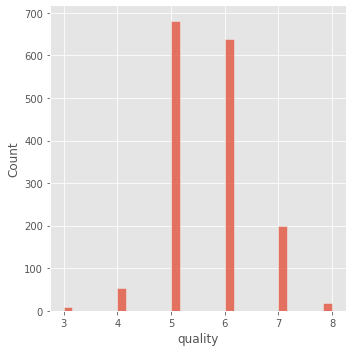

In [437]:
# Have a look at the quality count again.
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.displot(df['quality']);

In [438]:
# Split the data for training and testing.
x_train, x_test, y_train, y_test = mod.train_test_split(x, y, test_size=0.2, random_state=0)

With the code above 80 percent of the data will be used for training the algorithm and the remaining 20 percent will be for testing. This is specified with the `test_size` parameter. 

In [439]:
# Fit training data to the model.
regressor = lm.LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

### Interpreting Regression Coefficients for Linear Relationships

"The sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable and the dependent variable. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.

The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant. This property of holding the other variables constant is crucial because it allows you to assess the effect of each variable in isolation from the others." [https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/]

In [440]:
# Return dataframe with features & coefficient values.
coef = pd.DataFrame({'Coefficient': regressor.coef_})
coef.index = [['fixed acidity', 'volatile acidity', 'citric acid', 
                   'residual sugar', 'chlorides', 'free sulfur dioxide', 
                   'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']]
coef

,Coefficient
fixed acidity,0.041284
volatile acidity,-1.149528
citric acid,-0.177927
residual sugar,0.027870
chlorides,-1.873407
free sulfur dioxide,0.002684
total sulfur dioxide,-0.002777
density,-31.516666
pH,-0.254486
sulphates,0.924040


In [441]:
# Predict quality in training data.
train_pred = regressor.predict(x_train)
regressor.score(x_train, y_train)

0.3654519616206866

<br>

## `sklearn.metrics.mean_squared_error`

3.3. Metrics and scoring: quantifying the quality of predictions: https://scikit-learn.org/stable/modules/model_evaluation.html

In [442]:
# calculating rmse
train_rmse = mean_squared_error(train_pred, y_train) ** 0.5
train_rmse

NameError: name 'mean_squared_error' is not defined

In [443]:
test_rmse = mean_squared_error(test_pred, y_test) ** 0.5
test_rmse

NameError: name 'mean_squared_error' is not defined

In [444]:
print('Mean Absolute Error:', met.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', met.mean_squared_error(y_test, test_pred))
print('Root Mean Squared Error:', np.sqrt(met.mean_squared_error(y_test, test_pred)))

NameError: name 'test_pred' is not defined

In [445]:
# displaying coefficients of each feature
coeffecients = pd.DataFrame(regressor.coef_,features) 
coeffecients.columns = ['Coeffecient'] 
print(coeffecients)

NameError: name 'features' is not defined